In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
daily_accidents = pd.read_csv("/opt/datasets/ist652/summer2024/Motor_Vehicle_Collisions_-_Crashes_20240603.csv")

/tmp/ipykernel_526/2980678423.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_accidents = pd.read_csv("/opt/datasets/ist652/summer2024/Motor_Vehicle_Collisions_-_Crashes_20240603.csv")


In [4]:
print(daily_accidents.shape)

(2092013, 29)


In [5]:
daily_accidents.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [6]:
drop_columns = [
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

accidents = daily_accidents.drop(columns=drop_columns)


In [7]:
print(accidents.shape)

(2092013, 21)


In [8]:
print(accidents.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1'],
      dtype='object')


In [9]:
# Select relevant numerical columns
numerical_columns = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

# Summary statistics
summary_stats = accidents[numerical_columns].describe()

# Calculate Z-scores
z_scores = np.abs((accidents[numerical_columns] - accidents[numerical_columns].mean()) / accidents[numerical_columns].std())

# Define a threshold for Z-score, typically 3
z_score_threshold = 3
z_score_outliers = z_scores > z_score_threshold

# Calculate IQR
Q1 = accidents[numerical_columns].quantile(0.25)
Q3 = accidents[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for IQR, typically 1.5 * IQR
IQR_threshold = 1.5
IQR_outliers = (accidents[numerical_columns] < (Q1 - IQR_threshold * IQR)) | (accidents[numerical_columns] > (Q3 + IQR_threshold * IQR))

summary_stats, z_score_outliers.sum(), IQR_outliers.sum()

(       NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
 count               2.091995e+06              2.091982e+06   
 mean                3.119577e-01              1.502881e-03   
 std                 7.018805e-01              4.087538e-02   
 min                 0.000000e+00              0.000000e+00   
 25%                 0.000000e+00              0.000000e+00   
 50%                 0.000000e+00              0.000000e+00   
 75%                 0.000000e+00              0.000000e+00   
 max                 4.300000e+01              8.000000e+00   
 
        NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
 count                   2.092013e+06                  2.092013e+06   
 mean                    5.682852e-02                  7.447372e-04   
 std                     2.445908e-01                  2.774879e-02   
 min                     0.000000e+00                  0.000000e+00   
 25%                     0.000000e+00                  0.000000e+00   
 50% 

# Data Analysis

## 1.Which Boroughs Have the Highest Number of Collisions?

/tmp/ipykernel_526/3737283166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_collisions.index, y=borough_collisions.values, palette='viridis')


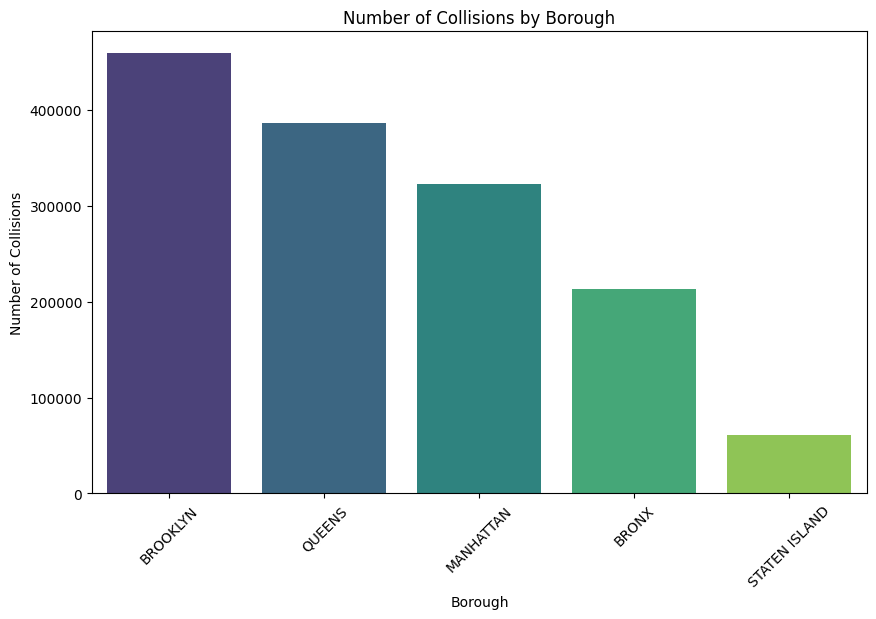

In [10]:
borough_collisions = accidents['BOROUGH'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_collisions.index, y=borough_collisions.values, palette='viridis')
plt.title('Number of Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()


## 2. What Time of Day Do Most Collisions Occur?

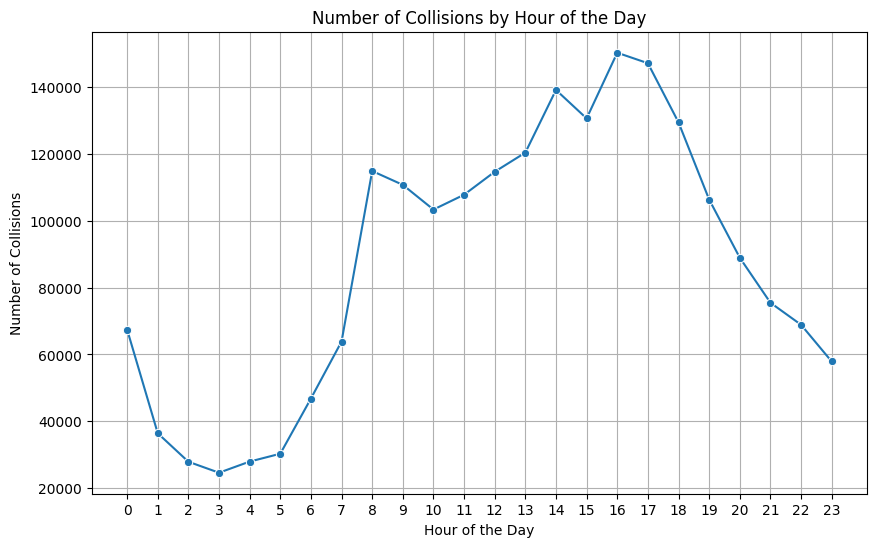

In [11]:
#extracting the hour from CRASH_TIME
accidents['CRASH_HOUR'] = pd.to_datetime(accidents['CRASH TIME'], format='%H:%M').dt.hour
hourly_collisions = accidents['CRASH_HOUR'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_collisions.index, y=hourly_collisions.values, marker='o')
plt.title('Number of Collisions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

## 3.top 5 vehicle types involved in collisions

In [12]:
vehicle_columns = [col for col in accidents.columns if 'VEHICLE TYPE CODE 1' in col]
vehicle_types = pd.Series(accidents[vehicle_columns].values.ravel()).value_counts().dropna()

# Get the top 5 vehicle types
top_5_vehicle_types = vehicle_types.head(5)
print(top_5_vehicle_types)

Sedan                                  584053
Station Wagon/Sport Utility Vehicle    459300
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    52007
Name: count, dtype: int64


## 4.What are the common contributing factors to collisions?

Common contributing factors to collisions:
 Unspecified                       710804
Driver Inattention/Distraction    419283
Failure to Yield Right-of-Way     124415
Following Too Closely             112026
Backing Unsafely                   77242
Name: count, dtype: int64


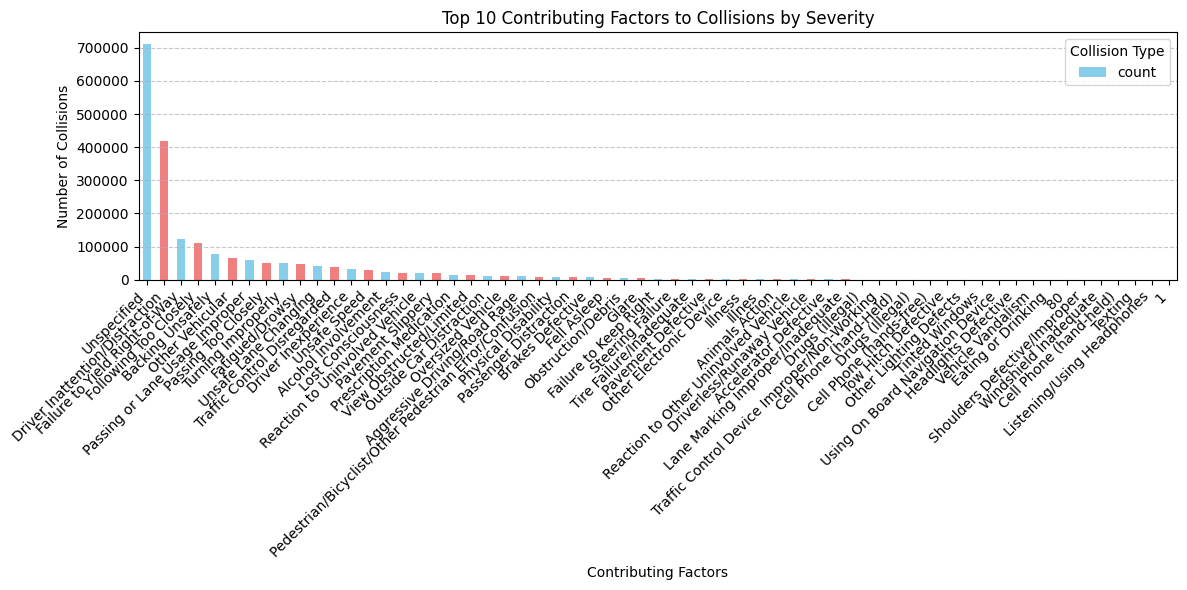

In [13]:
# Count the occurrences of each contributing factor
factor_columns = ['CONTRIBUTING FACTOR VEHICLE 1']
factor_counts = accidents[factor_columns].stack().value_counts()
print("Common contributing factors to collisions:\n", factor_counts.head(5))  # Display top 5 factors

#Plotting the stacked bar chart
factor_counts[factor_counts.index].T.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightcoral'])
plt.title('Top 10 Contributing Factors to Collisions by Severity')
plt.xlabel('Contributing Factors')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Collision Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Unspecified Factors: A large number of collisions have unspecified contributing factors, indicating potential gaps in data collection or reporting that need to be addressed.**

## 5. Analyze the distribution of injuries and fatalities among pedestrians, cyclists, and motorists across different boroughs.


In [14]:
numeric_columns = [
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

accidents[numeric_columns] = accidents[numeric_columns].apply(pd.to_numeric)

# Group by borough and aggregate sums
distribution_injuries_fatalities = accidents.groupby('BOROUGH')[numeric_columns].sum().reset_index()

print("Distribution of injuries and fatalities among different groups across boroughs:\n", distribution_injuries_fatalities)

Distribution of injuries and fatalities among different groups across boroughs:
          BOROUGH  NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0          BRONX                          15749                           136   
1       BROOKLYN                          32257                           339   
2      MANHATTAN                          21567                           237   
3         QUEENS                          22608                           282   
4  STATEN ISLAND                           2609                            39   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                       4587                        25   
1                      17132                        72   
2                      12991                        39   
3                       8512                        34   
4                        519                         4   

   NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  
0                       

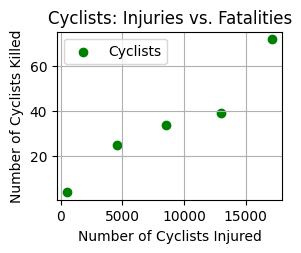

In [30]:
# Scatter plot for Cyclists Injured vs Killed
plt.subplot(2, 2, 2)
plt.scatter(distribution_injuries_fatalities['NUMBER OF CYCLIST INJURED'],
            distribution_injuries_fatalities['NUMBER OF CYCLIST KILLED'],
            color='green', label='Cyclists')
plt.xlabel('Number of Cyclists Injured')
plt.ylabel('Number of Cyclists Killed')
plt.title('Cyclists: Injuries vs. Fatalities')
plt.legend()
plt.grid(True)

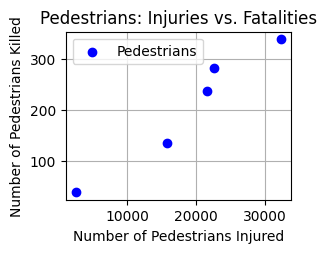

In [29]:
# Scatter plot for Pedestrians Injured vs Killed
plt.subplot(2, 2, 1)
plt.scatter(distribution_injuries_fatalities['NUMBER OF PEDESTRIANS INJURED'],
            distribution_injuries_fatalities['NUMBER OF PEDESTRIANS KILLED'],
            color='blue', label='Pedestrians')
plt.xlabel('Number of Pedestrians Injured')
plt.ylabel('Number of Pedestrians Killed')
plt.title('Pedestrians: Injuries vs. Fatalities')
plt.legend()
plt.grid(True)

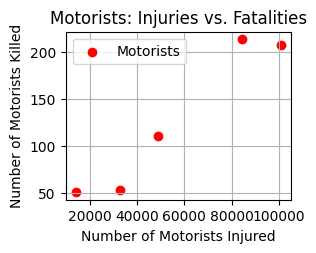

In [28]:
# Scatter plot for Motorists Injured vs Killed
plt.subplot(2, 2, 3)
plt.scatter(distribution_injuries_fatalities['NUMBER OF MOTORIST INJURED'],
            distribution_injuries_fatalities['NUMBER OF MOTORIST KILLED'],
            color='red', label='Motorists')
plt.xlabel('Number of Motorists Injured')
plt.ylabel('Number of Motorists Killed')
plt.title('Motorists: Injuries vs. Fatalities')
plt.legend()
plt.grid(True)

## 6.Monthly Variation in Collision Rates'

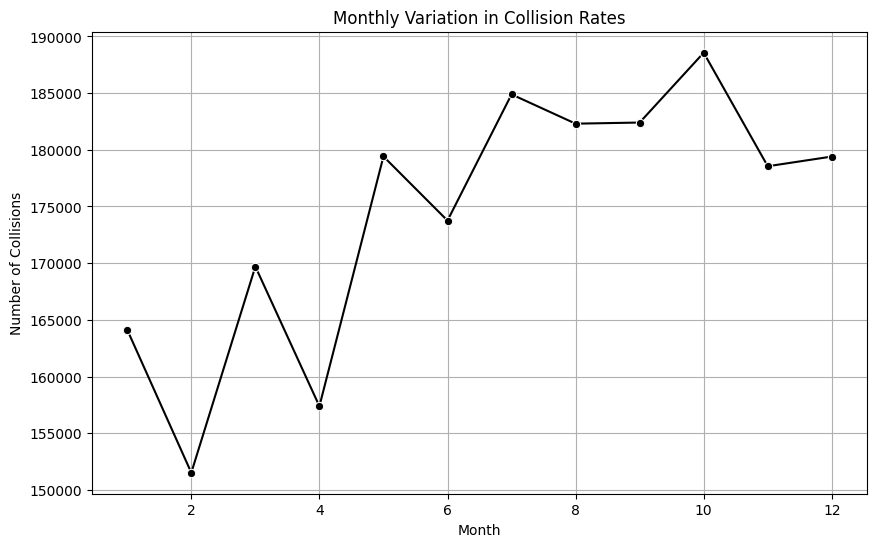

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CRASH DATE' to datetime format
accidents['CRASH DATE'] = pd.to_datetime(accidents['CRASH DATE'], format='%m/%d/%Y')

# Extract month from 'CRASH_DATE'
accidents['CRASH MONTH'] = accidents['CRASH DATE'].dt.month

# Group by month and count collisions
monthly_collisions = accidents['CRASH MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_collisions.index, y=monthly_collisions.values, marker='o', color='black')
plt.title('Monthly Variation in Collision Rates')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()


## Demographic Patterns and Collision Data in NYC Boroughs

In [15]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Check if the 'BOROUGH' column exists
if 'BOROUGH' in accidents.columns:
    # Drop rows with null values in the 'BOROUGH' column
    acc_filtered = accidents.dropna(subset=['BOROUGH'])
    
    # Aggregate collision data by borough
    collisions_by_borough = acc_filtered.groupby('BOROUGH').agg({
        'NUMBER OF PERSONS INJURED': 'sum',
        'NUMBER OF PERSONS KILLED': 'sum',
        'NUMBER OF PEDESTRIANS INJURED': 'sum',
        'NUMBER OF PEDESTRIANS KILLED': 'sum',
        'NUMBER OF CYCLIST INJURED': 'sum',
        'NUMBER OF CYCLIST KILLED': 'sum',
        'NUMBER OF MOTORIST INJURED': 'sum',
        'NUMBER OF MOTORIST KILLED': 'sum'
    }).reset_index()
    
    print("Aggregated collision data by borough:\n", collisions_by_borough)

    demographic_data = pd.DataFrame({
        'BOROUGH': ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND'],
        'POPULATION_DENSITY': [70000, 36000, 22000, 34000, 8300]  # People per square mile
    })
    
    print("Demographic data:\n", demographic_data)

    # Merge collision data with demographic data
    merged_data = pd.merge(collisions_by_borough, demographic_data, on='BOROUGH')
    print("Merged collision and demographic data:\n", merged_data)

    from shapely.geometry import Polygon

    boroughs_geom = {
        'MANHATTAN': Polygon([(-74.0187, 40.7018), (-73.9187, 40.7018), (-73.9187, 40.8518), (-74.0187, 40.8518)]),
        'BROOKLYN': Polygon([(-74.0420, 40.5700), (-73.9020, 40.5700), (-73.9020, 40.7200), (-74.0420, 40.7200)]),
        'QUEENS': Polygon([(-73.9500, 40.5411), (-73.7900, 40.5411), (-73.7900, 40.8000), (-73.9500, 40.8000)]),
        'BRONX': Polygon([(-73.9330, 40.7850), (-73.7930, 40.7850), (-73.7930, 40.9000), (-73.9330, 40.9000)]),
        'STATEN ISLAND': Polygon([(-74.2558, 40.4754), (-74.1258, 40.4754), (-74.1258, 40.6554), (-74.2558, 40.6554)])
    }
    
    gdf_boroughs = gpd.GeoDataFrame(pd.DataFrame({
        'BOROUGH': boroughs_geom.keys(),
        'geometry': boroughs_geom.values()
    }), geometry='geometry')
    
    print("GeoDataFrame for boroughs:\n", gdf_boroughs)

    # Merge the GeoDataFrame with the collision and demographic data
    gdf_merged = gdf_boroughs.merge(merged_data, on='BOROUGH')

Aggregated collision data by borough:
          BOROUGH  NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0          BRONX                    70229.0                     281.0   
1       BROOKLYN                   152597.0                     633.0   
2      MANHATTAN                    68322.0                     333.0   
3         QUEENS                   117027.0                     534.0   
4  STATEN ISLAND                    17372.0                      95.0   

   NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                          15749                           136   
1                          32257                           339   
2                          21567                           237   
3                          22608                           282   
4                           2609                            39   

   NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                       4587                        25   
1        

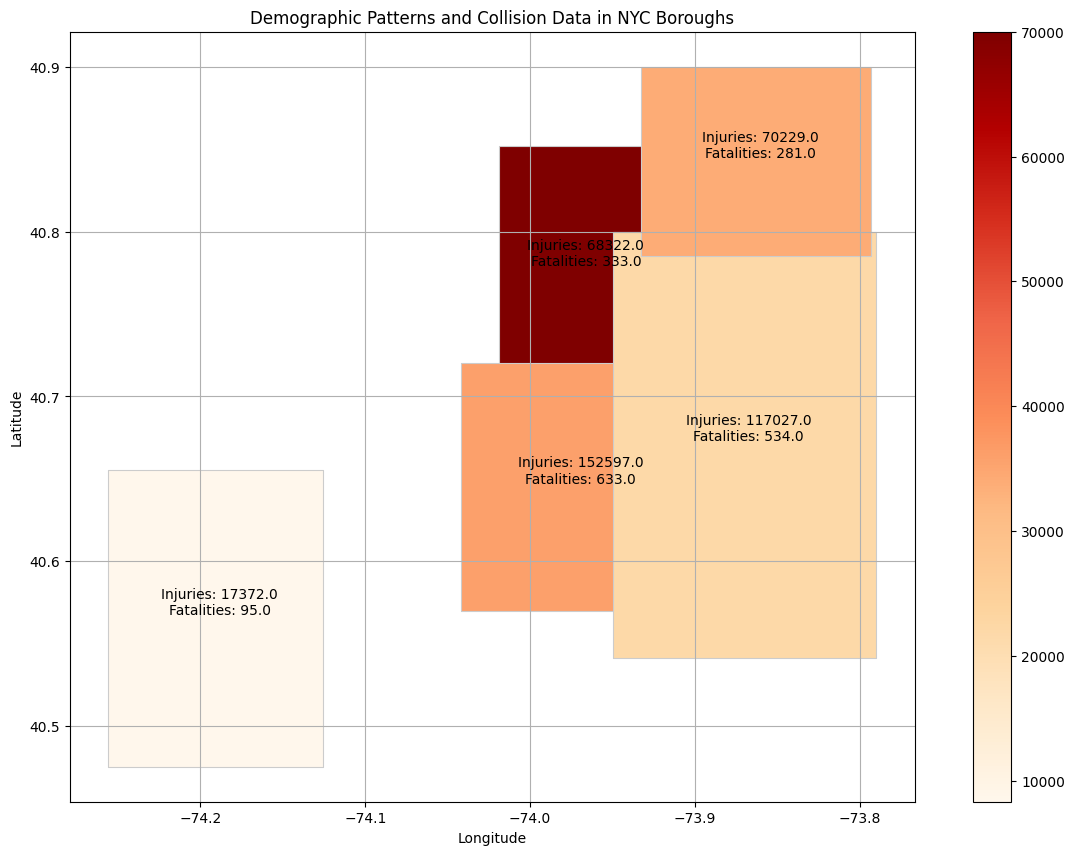

In [17]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_merged.plot(column='POPULATION_DENSITY', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels for number of injuries and fatalities
for idx, row in gdf_merged.iterrows():
    # Define the text to display in the annotation
    text = f"Injuries: {row['NUMBER OF PERSONS INJURED']}\nFatalities: {row['NUMBER OF PERSONS KILLED']}"
    
    # Add the annotation
    ax.annotate(text,
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                xytext=(3, 3),  # Offset of the text from the point
                textcoords="offset points",
                ha='center')  # Horizontal alignment of the text

plt.title('Demographic Patterns and Collision Data in NYC Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
